In [ ]:
!pip install -q darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 131.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Standard library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, root_mean_squared_error
from sklearn.model_selection import ParameterGrid

# Darts functions
from darts.timeseries import TimeSeries
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving train_data.csv to train_data.csv


In [ ]:
# load the train_data and set the index
train_data = pd.read_csv('train_data.csv', parse_dates=True, index_col='Date')
train_data.head()

,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²),turbidity
Date,,,,,,
2020-12-31 15:00:00,4.0,78,9.8,0.391,55,0.430411
2020-12-31 16:00:00,3.4,85,5.6,0.391,25,0.522836
2020-12-31 17:00:00,1.5,94,7.3,0.390,3,0.512069
2020-12-31 18:00:00,0.8,95,7.1,0.389,0,0.450545
2020-12-31 19:00:00,-0.1,97,8.4,0.388,0,0.405494


In [ ]:
train_data = train_data.rename(columns={'turbidity': 'y'})

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21000 entries, 2020-12-31 15:00:00 to 2023-05-25 14:00:00
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   temperature_2m (°C)             21000 non-null  float64
 1   relative_humidity_2m (%)        21000 non-null  int64  
 2   wind_speed_10m (km/h)           21000 non-null  float64
 3   soil_moisture_0_to_7cm (m³/m³)  21000 non-null  float64
 4   direct_radiation (W/m²)         21000 non-null  int64  
 5   y                               21000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.1 MB


In [ ]:
# set the frequency of the time series
train_data = train_data.asfreq('h')

# Exploratory Data Analysis

<Axes: title={'center': 'Turbidity Time Series'}, xlabel='Date'>

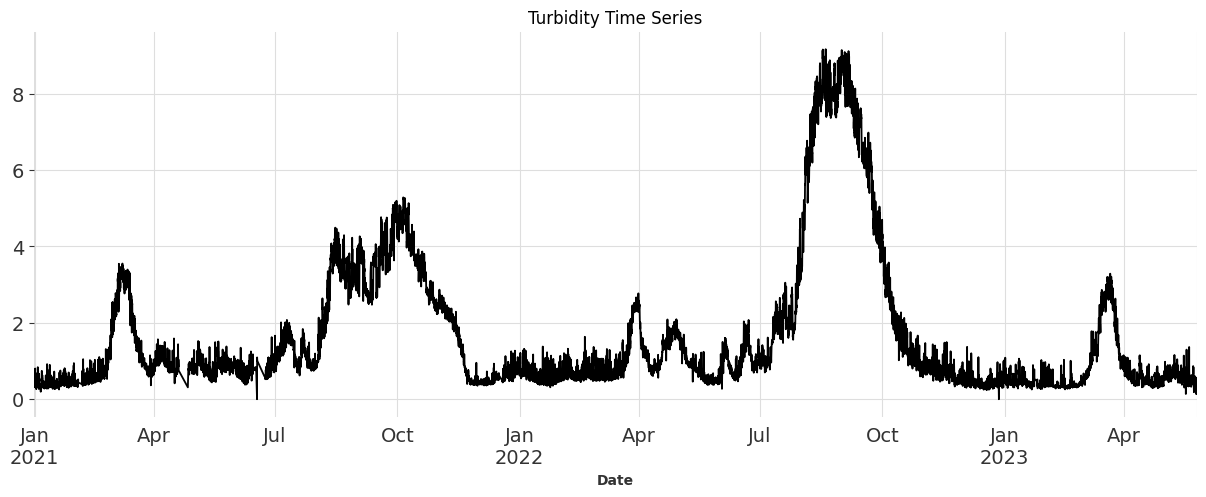

In [ ]:
train_data['y'].plot(figsize=(15, 5), title='Turbidity Time Series', fontsize=14)

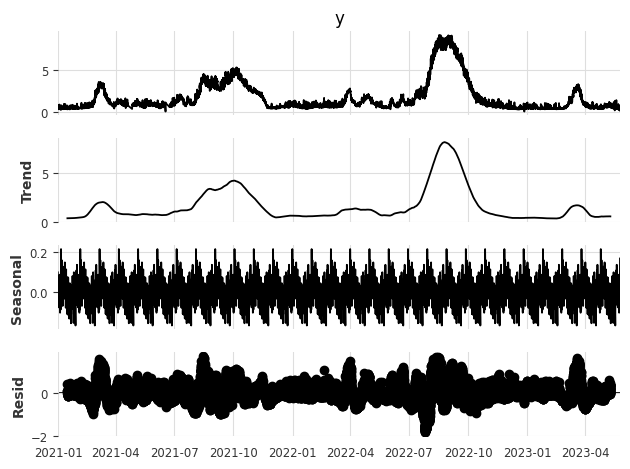

In [ ]:
# seasonal decomposition plots
decomposition = seasonal_decompose(train_data['y'], model='additive', period=24*30)
decomposition.plot()
plt.show()

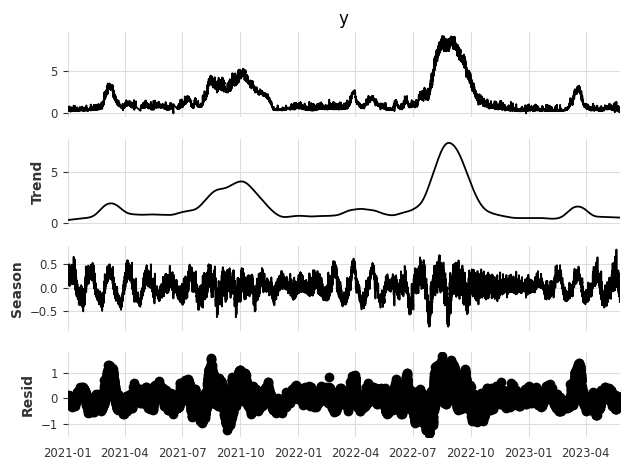

In [ ]:
from statsmodels.tsa.seasonal import STL
stl = STL(train_data['y'], period=24*30)
stl_result = stl.fit()
stl_result.plot()
plt.show()

# TFT

In [ ]:
train_data.index

DatetimeIndex(['2020-12-31 15:00:00', '2020-12-31 16:00:00',
               '2020-12-31 17:00:00', '2020-12-31 18:00:00',
               '2020-12-31 19:00:00', '2020-12-31 20:00:00',
               '2020-12-31 21:00:00', '2020-12-31 22:00:00',
               '2020-12-31 23:00:00', '2021-01-01 00:00:00',
               ...
               '2023-05-25 05:00:00', '2023-05-25 06:00:00',
               '2023-05-25 07:00:00', '2023-05-25 08:00:00',
               '2023-05-25 09:00:00', '2023-05-25 10:00:00',
               '2023-05-25 11:00:00', '2023-05-25 12:00:00',
               '2023-05-25 13:00:00', '2023-05-25 14:00:00'],
              dtype='datetime64[ns]', name='Date', length=21000, freq='h')

In [ ]:
# preparing the time series for Darts
train_data_series = TimeSeries.from_dataframe(train_data, value_cols='y')


In [ ]:
train_data_series.head()

<TimeSeries (DataArray) (Date: 5, component: 1, sample: 1)> Size: 40B
array([[[0.43041088]],

       [[0.52283552]],

       [[0.5120693 ]],

       [[0.45054495]],

       [[0.40549446]]])
Coordinates:
  * Date       (Date) datetime64[ns] 40B 2020-12-31T15:00:00 ... 2020-12-31T1...
  * component  (component) <U1 4B 'y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [ ]:
# Time as an Encoder


In [ ]:
# set up the add_encoders dictionary



# Past Covariates

In [ ]:
# Isolate the past covariates
X_train_past_covariates = train_data.iloc[:, 0:5]

past_covariates = TimeSeries.from_dataframe(X_train_past_covariates)


In [ ]:
past_covariates

<TimeSeries (DataArray) (Date: 21000, component: 5, sample: 1)> Size: 840kB
array([[[4.00e+00],
        [7.80e+01],
        [9.80e+00],
        [3.91e-01],
        [5.50e+01]],

       [[3.40e+00],
        [8.50e+01],
        [5.60e+00],
        [3.91e-01],
        [2.50e+01]],

       [[1.50e+00],
        [9.40e+01],
        [7.30e+00],
        [3.90e-01],
        [3.00e+00]],

       ...,

       [[1.66e+01],
        [5.70e+01],
        [1.68e+01],
        [2.44e-01],
        [2.03e+02]],

       [[1.62e+01],
        [6.00e+01],
        [1.73e+01],
        [2.43e-01],
        [4.09e+02]],

       [[1.63e+01],
        [6.20e+01],
        [1.80e+01],
        [2.42e-01],
        [1.08e+02]]])
Coordinates:
  * Date       (Date) datetime64[ns] 168kB 2020-12-31T15:00:00 ... 2023-05-25...
  * component  (component) <U30 600B 'temperature_2m (°C)' ... 'direct_radiat...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

# Future Covariates

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving test_data.csv to test_data.csv


In [ ]:
# Get the future covariates
test_data = pd.read_csv('test_data.csv', parse_dates=True, index_col='Date')
test_data = test_data.rename(columns={'turbidity': 'y'})


In [ ]:
test_data = test_data.asfreq('h')

In [ ]:
X_test_future_covariates = test_data.iloc[:, 0:5]
X = pd.concat([X_train_past_covariates, X_test_future_covariates])

In [ ]:
X

,temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),direct_radiation (W/m²)
Date,,,,,
2020-12-31 15:00:00,4.0,78,9.8,0.391,55
2020-12-31 16:00:00,3.4,85,5.6,0.391,25
2020-12-31 17:00:00,1.5,94,7.3,0.390,3
2020-12-31 18:00:00,0.8,95,7.1,0.389,0
2020-12-31 19:00:00,-0.1,97,8.4,0.388,0
...,...,...,...,...,...
2023-12-30 05:00:00,6.9,90,21.5,0.399,0
2023-12-30 06:00:00,6.9,90,21.4,0.399,0
2023-12-30 07:00:00,6.7,91,19.0,0.398,0


In [ ]:
future_covariates = TimeSeries.from_dataframe(X)

# Scaling

In [ ]:
scaler1 = Scaler()
scaler2 = Scaler()



In [ ]:
#  apply the scaler to the time series
y_transformed = scaler1.fit_transform(train_data_series)


In [ ]:
# Apply the scaler to the covariates
past_covariates_transformed = scaler2.fit_transform(past_covariates)
future_covariates_transformed = scaler2.fit_transform(future_covariates)

# TFT Model

In [ ]:
# set the forecasting horizon
forecast_horizon = 24*1

In [ ]:
# Build the TFT model
model = TFTModel(
    input_chunk_length = 24*7,
    output_chunk_length = forecast_horizon,
    hidden_size = 16,
    lstm_layers = 2,
    num_attention_heads = 4,
    dropout = 0.1,
    batch_size = 64,
    n_epochs = 10,
    pl_trainer_kwargs = {'accelerator': 'gpu', 'devices': [0]}
)

model.fit(y_transformed,
          past_covariates=past_covariates_transformed,
          future_covariates=future_covariates_transformed)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics             

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


TFTModel(output_chunk_shift=0, hidden_size=16, lstm_layers=2, num_attention_heads=4, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.1, hidden_continuous_size=8, categorical_embedding_sizes=None, add_relative_index=False, loss_fn=None, likelihood=None, norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=168, output_chunk_length=24, batch_size=64, n_epochs=10, pl_trainer_kwargs={'accelerator': 'gpu', 'devices': [0]})

# Cross-validation

In [ ]:
# Cross Validation with rolling forecast
cv = model.historical_forecasts(
    series=y_transformed,
    past_covariates=past_covariates_transformed,
    future_covariates=future_covariates_transformed,
    forecast_horizon=forecast_horizon,
    start=train_data.shape[0] - 10 * forecast_horizon,
    retrain=True,
    stride = forecast_horizon,
    last_points_only=False
)



INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 0      | train
4  | encoder_vsn                       | _VariableSelectionNetwork      

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metric

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metric

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metric

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metric

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metric

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metric

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metric

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metric

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metric

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [ ]:
rmse_cv = []

for i in range(len(cv)):
    # outcome of the cv
    predictions = TimeSeries.pd_series(scaler1.inverse_transform(cv[i]))

    # actuals
    start = predictions.index.min()
    end = predictions.index.max()
    actuals = train_data.y[start:end]

    # Compute the RMSE
    rmse_cv.append(np.sqrt(mean_squared_error(actuals, predictions)))

print(f'The CV error is: {np.mean(rmse_cv)}')
print(f'Here is the list of errors: {rmse_cv}')



AttributeError: type object 'TimeSeries' has no attribute 'pd_series'

In [ ]:
# set the size
fix, ax = plt.subplots(figsize=(15, 5))

# plotting
for i in range(len(cv)):
  # outcome of the cv
  predictions = TimeSeries.pd_series(scaler1.inverse_transform(cv[i]))

  # actuals
  start = predictions.index.min()
  end = predictions.index.max()
  actuals = train_data.y[start:end]

  # Plotting
  ax.plot(actuals, label = 'actuals')
  ax.plot(predictions, label = 'predictions', linestyle = 'dashed')


ax.set_xlabel('Time')
ax.set_ylabel('Turbidity')
ax.set_title('TFT Model')
ax.legend()
plt.show()




# Parameter tuning

In [ ]:
from sklearn.model_selection import ParameterSampler


In [ ]:
# Parameter Grid
param_grid = {
      'hidden_size': [8, 16, 24],
      'lstm_layers': [1,2,4],
      'input_chunk_length':[24*7, 24*30],
      'output_chunk_length': [24],
      'num_attention_heads': [2, 4, 6],
      'dropout': [0.1, 0.2, 0.3],
      'batch_size': [32, 64, 128],
      'n_epochs': [5, 10]
      }



In [ ]:
# Number of combinations to try
n_iter = 20

params_list = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

params_list2 = params_list.copy()
print(params_list)

In [ ]:
# Parameters which are setting
fixed_params={
    'pl_trainer_kwargs': {'accelerator': 'gpu', 'devices': [0]}
}



# add the params
for params in params_list:
  params.update(fixed_params)

In [ ]:
# check the params
params_list

In [ ]:
# Parameter Tuning
rmse_list = []

for params in params_list:
  # Build the TFT model
  model = TFTModel(**params)

  # CV
  cv = model.historical_forecasts(
      series=y_transformed,
      past_covariates=past_covariates_transformed,
      future_covariates=future_covariates_transformed,
      forecast_horizon=forecast_horizon,
      start=train_data.shape[0] - 10 * forecast_horizon,
      retrain=True,
      stride = forecast_horizon,
      last_points_only=False
    )
  # Results
  rmse_cv = []

  for i in range(len(cv)):
    # outcome of the cv
    predictions = TimeSeries.pd_series(scaler1.inverse_transform(cv[i]))

    # actuals
    start = predictions.index.min()
    end = predictions.index.max()
    actuals = train_data.y[start:end]

    # compute the error
    rmse_cv.append(np.sqrt(mean_squared_error(actuals, predictions)))



# append the error
rmse_list.append(np.mean(rmse_cv))
print(f'Test parameters: {params} => RMSE{np.mean(rmse_cv)}')


In [ ]:
# check the best results
results = pd.DataFrame(params_list2)
results['rmse'] = rmse_list
results.sort_values(by='rmse')

In [ ]:
# Export the params
best_params = results[results['rmse'] == results['rmse'].min()]
best_params.to_csv('best_params.csv')
best_params

# Predict the Future

In [ ]:
best_params = pd.read_csv('best_params.csv',index_col=0).drop(columns='rmse')
best_params_dict = best_params.squeeze().to_dict()
best_params_dict

In [ ]:
# convert float parameters to integers
input_params = ['input_chunk_length', 'output_chunk_length', 'batch_size', 'n_epochs', 'hidden_size','num_attention_heads','lstm_layers']


for param in input_params:
  best_params_dict[param] = int(best_params_dict[param])



In [ ]:
# Add the fixed params
best_params_dict.update(fixed_params)
print(best_params_dict)

In [ ]:
# Build the Tuned TFT model
tuned_model = TFTModel(**best_params_dict)
tuned_model.fit(y_transformed,
          past_covariates=past_covariates_transformed,
          future_covariates=future_covariates_transformed)


In [ ]:
# Forecast the future
forecast = tuned_model.predict(n=len(test_data),
                eries = y_transformed,
                past_covariates=past_covariates_transformed,
                future_covariates=future_covariates_transformed,
                )

forecast = TimeSeries.pd_series(scaler1.inverse_transform(forecast))

forecast

In [ ]:
# Plot the forecast
fix, ax = plt.subplots(figsize=(15, 5))

# plotting
ax.plot(test_data.y, label = 'actuals')
ax.plot(forecast, label = 'predictions', linestyle = 'dashed')
ax.set_xlabel('Time')
ax.set_ylabel('Turbidity')
ax.set_title('TFT Model')
ax.legend()
plt.show()

# Interpretability

In [ ]:
from darts.explainability import TFTExplainer

In [ ]:
# Build the explainer
explainer = TFTExplainer(tuned_model)
explainability_result = explainer.explain()

In [ ]:
# PLotting
explainer.plot_variable_selection(explainability_result, fig_size=(15,15))


In [ ]:
# Attention mechanism
explainer.plot_attention_mechanism(explainability_result, plot_type='heatmap', fig_size=(15,15))
